In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [18]:
def fun(x, y):
    return (x**2 + y**2)**2

In [19]:
n = 100
X1, X2 = np.mgrid[-1:1:(n*1j), -1:1:(n*1j)]
Z = fun(X1,X2)

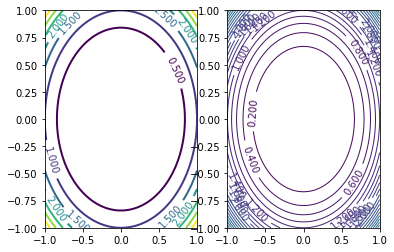

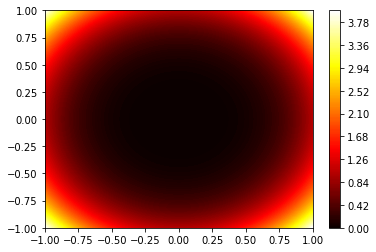

In [42]:
fig, ax = plt.subplots(ncols=2)
contours = ax[0].contour(X1, X2, Z, linewidths=2)
ax[0].clabel(contours)

contours = ax[1].contour(X1, X2, Z, np.arange(0, 10, 0.2), linewidths=1)
ax[1].clabel(contours)

fig, ax = plt.subplots()
contours = ax.contourf(X1, X2, Z, 200, cmap=plt.cm.hot)
fig.colorbar(contours)

In [ ]:
import numpy as np
from scipy.interpolate import Rbf
import matplotlib.pyplot as plt
# Make data repeatable
np.random.seed(1981)

# Generate some random wells with random head (water table) observations
x, y, z = np.random.random((3, 10))

# Interpolate these onto a regular grid
xi, yi = np.mgrid[0:1:100j, 0:1:100j]
func = Rbf(x, y, z, function='linear')
zi = func(xi, yi)

# -- Plot --------------------------
fig, ax = plt.subplots()

# Plot flowlines
dy, dx = np.gradient(-zi.T) # Flow goes down gradient (thus -zi)
ax.streamplot(xi[:,0], yi[0,:], dx, dy, color='0.8', density=2)

# Contour gridded head observations
contours = ax.contour(xi, yi, zi, linewidths=2)
ax.clabel(contours)

# Plot well locations
ax.plot(x, y, 'ko')

plt.show()